# Data Exploration: Tourism in Finland

As an avid traveller myself, I am always interested in Finland from a tourism point of view - what is Finland like as a destination? How popular is it? How is it perceived?

Anecdotally, I have felt that Finland has become an increasingly attractive travel destination, as I seem to see more and more tourists when walking around the streets of Helsinki.
Further, based on media articles it has seemed to me that Finnish Lapland has been an attractive destination especially to Asians due to the winter experience, polar lights, and Santa Claus. 

I am interested to see if these ideas are also supported by the data as well. 
The data is openly available and supplied by Visit Finland.
It was gathered manually from their table [web interface](https://visitfinland.stat.fi/PXWeb/pxweb/fi/VisitFinland/VisitFinland__Majoitustilastot/visitfinland_matk_pxt_116n.px/).


### Setup

First we will load packages and raw data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Use seaborn themes for plotting
sns.set_theme()

In [2]:
data = pd.read_csv("visitor_data_raw.csv", sep=";")
data.head()

,Kuukausi,Saapuneet KOKO MAA Ulkomaiset,Saapuneet KOKO MAA EU-28,Saapuneet KOKO MAA Skandinavia,Saapuneet KOKO MAA Aasia,Saapuneet KOKO MAA Oseania,Saapuneet KOKO MAA Afrikka,Saapuneet KOKO MAA Amerikka,Saapuneet KOKO MAA Venäjä,Saapuneet KOKO MAA Saksa,...,"Saapuneiden muutos, % SA LAPPI JA KUUSAMO Tsekki","Saapuneiden muutos, % SA LAPPI JA KUUSAMO Turkki","Saapuneiden muutos, % SA LAPPI JA KUUSAMO Ukraina","Saapuneiden muutos, % SA LAPPI JA KUUSAMO Unkari","Saapuneiden muutos, % SA LAPPI JA KUUSAMO Uruguay","Saapuneiden muutos, % SA LAPPI JA KUUSAMO Uusi-Seelanti","Saapuneiden muutos, % SA LAPPI JA KUUSAMO Valko-Venäjä","Saapuneiden muutos, % SA LAPPI JA KUUSAMO Venezuela","Saapuneiden muutos, % SA LAPPI JA KUUSAMO Vietnam","Saapuneiden muutos, % SA LAPPI JA KUUSAMO Muut maat"
0,1995M01,75195,41311,17791,4171,272,172,3825,18082,6411,...,.,.,.,.,.,.,.,.,.,.
1,1995M02,72455,41489,18117,4444,208,148,4265,13939,8643,...,.,.,.,.,.,.,.,.,.,.
2,1995M03,93451,53894,25329,4631,350,201,5706,18079,8922,...,.,.,.,.,.,.,.,.,.,.
3,1995M04,76014,44103,21009,4154,351,265,5127,13472,5733,...,.,.,.,.,.,.,.,.,.,.
4,1995M05,115716,71598,35488,7968,880,404,8916,13707,14107,...,.,.,.,.,.,.,.,.,.,.


The table contains month-partitioned data between 1995-2023. 
The columns seem to be in Finnish, where visitor counts are given on different area levels: there are larger areas/continents as well was countries.
Visitor counts can also be found for some specific Finnish regions such as Helsinki Metropolitan area and Lapland.

In [343]:
data["year_month"] = data["Kuukausi"].str.replace("*", "", regex=False)
data["year_month"] = pd.to_datetime(data["year_month"], format="%YM%m")
data.head()

,Kuukausi,Saapuneet KOKO MAA Ulkomaiset,Saapuneet KOKO MAA EU-28,Saapuneet KOKO MAA Skandinavia,Saapuneet KOKO MAA Aasia,Saapuneet KOKO MAA Oseania,Saapuneet KOKO MAA Afrikka,Saapuneet KOKO MAA Amerikka,Saapuneet KOKO MAA Venäjä,Saapuneet KOKO MAA Saksa,...,"Saapuneiden muutos, % SA LAPPI JA KUUSAMO Turkki","Saapuneiden muutos, % SA LAPPI JA KUUSAMO Ukraina","Saapuneiden muutos, % SA LAPPI JA KUUSAMO Unkari","Saapuneiden muutos, % SA LAPPI JA KUUSAMO Uruguay","Saapuneiden muutos, % SA LAPPI JA KUUSAMO Uusi-Seelanti","Saapuneiden muutos, % SA LAPPI JA KUUSAMO Valko-Venäjä","Saapuneiden muutos, % SA LAPPI JA KUUSAMO Venezuela","Saapuneiden muutos, % SA LAPPI JA KUUSAMO Vietnam","Saapuneiden muutos, % SA LAPPI JA KUUSAMO Muut maat",year_month
0,1995M01,75195,41311,17791,4171,272,172,3825,18082,6411,...,.,.,.,.,.,.,.,.,.,1995-01-01
1,1995M02,72455,41489,18117,4444,208,148,4265,13939,8643,...,.,.,.,.,.,.,.,.,.,1995-02-01
2,1995M03,93451,53894,25329,4631,350,201,5706,18079,8922,...,.,.,.,.,.,.,.,.,.,1995-03-01
3,1995M04,76014,44103,21009,4154,351,265,5127,13472,5733,...,.,.,.,.,.,.,.,.,.,1995-04-01
4,1995M05,115716,71598,35488,7968,880,404,8916,13707,14107,...,.,.,.,.,.,.,.,.,.,1995-05-01


In [344]:
cols = data.columns
cols_whole_finland = cols[cols.str.contains("Saapuneet KOKO MAA")]
cols_whole_finland
data_whole_country = data[["year_month", *cols_whole_finland]]

data_whole_country.head()

,year_month,Saapuneet KOKO MAA Ulkomaiset,Saapuneet KOKO MAA EU-28,Saapuneet KOKO MAA Skandinavia,Saapuneet KOKO MAA Aasia,Saapuneet KOKO MAA Oseania,Saapuneet KOKO MAA Afrikka,Saapuneet KOKO MAA Amerikka,Saapuneet KOKO MAA Venäjä,Saapuneet KOKO MAA Saksa,...,Saapuneet KOKO MAA Tsekki,Saapuneet KOKO MAA Turkki,Saapuneet KOKO MAA Ukraina,Saapuneet KOKO MAA Unkari,Saapuneet KOKO MAA Uruguay,Saapuneet KOKO MAA Uusi-Seelanti,Saapuneet KOKO MAA Valko-Venäjä,Saapuneet KOKO MAA Venezuela,Saapuneet KOKO MAA Vietnam,Saapuneet KOKO MAA Muut maat
0,1995-01-01,75195,41311,17791,4171,272,172,3825,18082,6411,...,243,83,56,278,1,25,32,54,11,232
1,1995-02-01,72455,41489,18117,4444,208,148,4265,13939,8643,...,211,121,243,313,0,27,82,26,2,222
2,1995-03-01,93451,53894,25329,4631,350,201,5706,18079,8922,...,213,154,70,349,2,25,20,44,7,232
3,1995-04-01,76014,44103,21009,4154,351,265,5127,13472,5733,...,310,129,56,238,5,24,19,19,13,237
4,1995-05-01,115716,71598,35488,7968,880,404,8916,13707,14107,...,487,254,46,417,11,122,39,49,30,425


In [345]:
data_whole_country.columns = data_whole_country.columns.str.replace("Saapuneet KOKO MAA ", "")
rename_dict = {
    "Ulkomaiset": "total",
    "Yhdysvallat (USA)": "USA",
    "Korean demokraattinen kansantasavalta (Pohjois-Korea)": "Pohjois-Korea",
    "Korean tasavalta (Etelä-Korea)": "Etelä-Korea",
}
data_whole_country = data_whole_country.rename(columns=rename_dict)
data_whole_country.head()

,year_month,total,EU-28,Skandinavia,Aasia,Oseania,Afrikka,Amerikka,Venäjä,Saksa,...,Tsekki,Turkki,Ukraina,Unkari,Uruguay,Uusi-Seelanti,Valko-Venäjä,Venezuela,Vietnam,Muut maat
0,1995-01-01,75195,41311,17791,4171,272,172,3825,18082,6411,...,243,83,56,278,1,25,32,54,11,232
1,1995-02-01,72455,41489,18117,4444,208,148,4265,13939,8643,...,211,121,243,313,0,27,82,26,2,222
2,1995-03-01,93451,53894,25329,4631,350,201,5706,18079,8922,...,213,154,70,349,2,25,20,44,7,232
3,1995-04-01,76014,44103,21009,4154,351,265,5127,13472,5733,...,310,129,56,238,5,24,19,19,13,237
4,1995-05-01,115716,71598,35488,7968,880,404,8916,13707,14107,...,487,254,46,417,11,122,39,49,30,425


In [346]:
translations = pd.read_csv("countries_translations.csv")
translations

data_whole_country = data_whole_country.rename(
    columns=dict(zip(translations["area_fin"], translations["area_eng"]))
)
data_whole_country.columns
data_whole_country = data_whole_country.set_index("year_month")
data_whole_country.head()

,total,EU-28,Skandinavia,Asia,Oceania,Africa,Americas,Russia,Germany,Sweden,...,Tsekki,Turkey,Ukraine,Hungary,Uruguay,New Zealand,Belarus,Venezuela,Vietnam,Muut maat
year_month,,,,,,,,,,,,,,,,,,,,,
1995-01-01,75195,41311,17791,4171,272,172,3825,18082,6411,12080,...,243,83,56,278,1,25,32,54,11,232
1995-02-01,72455,41489,18117,4444,208,148,4265,13939,8643,12042,...,211,121,243,313,0,27,82,26,2,222
1995-03-01,93451,53894,25329,4631,350,201,5706,18079,8922,16928,...,213,154,70,349,2,25,20,44,7,232
1995-04-01,76014,44103,21009,4154,351,265,5127,13472,5733,14876,...,310,129,56,238,5,24,19,19,13,237
1995-05-01,115716,71598,35488,7968,880,404,8916,13707,14107,26511,...,487,254,46,417,11,122,39,49,30,425


<AxesSubplot:xlabel='year_month'>

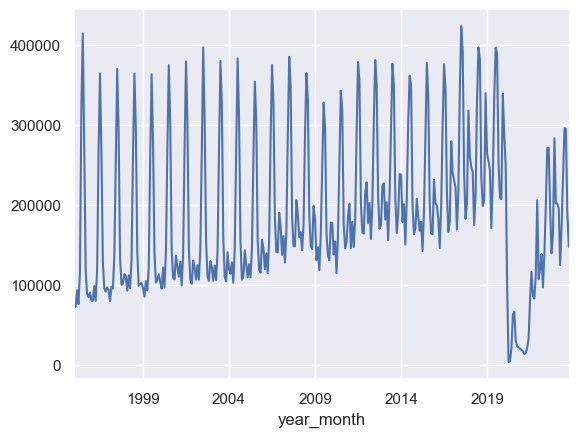

In [347]:
data_whole_country["total"].plot()

we dont take diff 12 because we are not interested in year-back, more about the trend related to the start of data collection

<AxesSubplot:xlabel='year_month'>

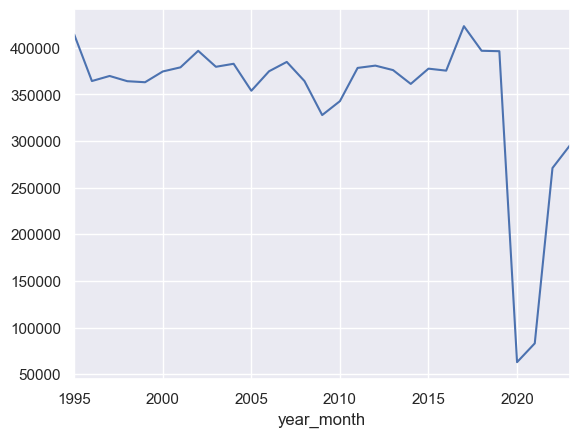

In [348]:
result = seasonal_decompose(data_whole_country["total"], model="multiplicative", period=12)

# Extract the detrended values
# df['detrended'] = result.resid
detrended = data_whole_country["total"].diff(12)
total_indexed = data_whole_country["total"] - data_whole_country.loc["1995-01-01", "total"]
# detrended.plot()
july_data = data_whole_country["total"][data_whole_country.index.month == 7]
july_data.plot()
# result.resid.dropna()
# result.resid.plot()

What i thingk about the images

In [349]:
data_whole_country
data_2023 = pd.DataFrame(
    data_whole_country[data_whole_country.index.year == 2023].sum(), columns=["visitors"]
)
data_2023[:10]

regions = ["EU-28", "Asia", "Oceania", "Africa", "Americas"]
region_data = data_2023.loc[regions].sort_values("visitors", ascending=False)
# region_data.plot(kind="bar")

data_2023
drop = ["total", "Skandinavia", *regions, "Muut maat"]
top10_countries = data_2023.drop(drop).sort_values("visitors", ascending=False)[:10]

(-1.1149510910815064,
 1.1007119568309038,
 -1.1119078527607464,
 1.118737840190898)

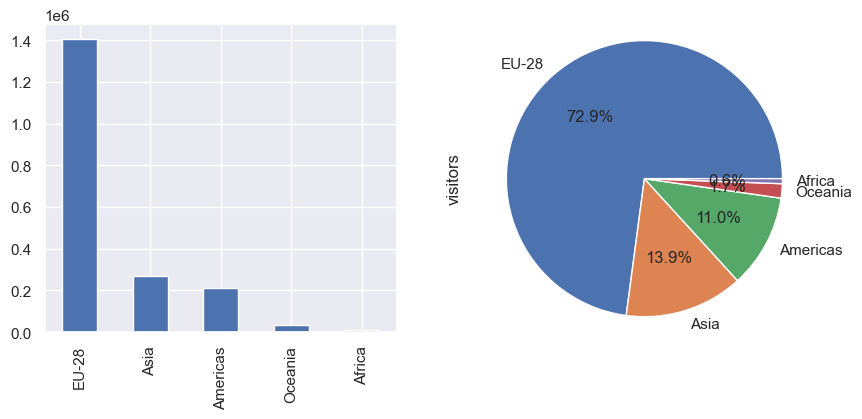

In [350]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))


region_data.plot(kind="bar", ax=axs[0], legend=None)
region_data.plot(kind="pie", y="visitors", ax=axs[1], legend=False, autopct="%1.1f%%")
plt.axis("equal")

# top10_countries.plot(kind="bar", ax=axs[1], legend=None)

<AxesSubplot:>

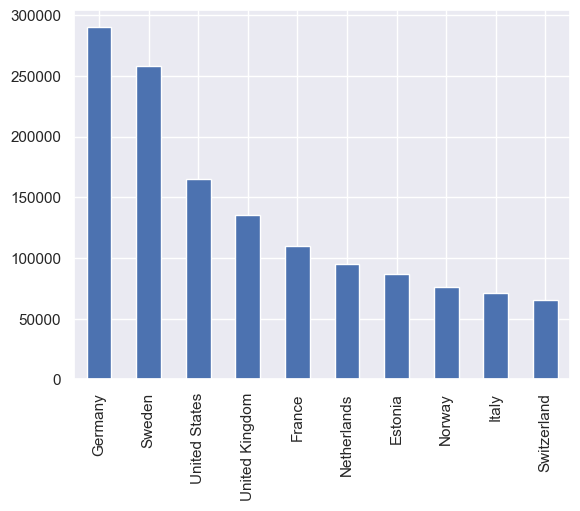

In [351]:
# fig, axs = plt.subplots(1, 2, figsize=(10, 4))


top10_countries.plot(kind="bar", legend=None)
# top10_countries.plot(kind="pie", y="visitors", ax=axs[1], legend=None)
# plt.axis('equal')

In [352]:
data_whole_country.to_csv("visitor_data.csv")